In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import the mdates module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
# Reading the dataset into the program
data = pd.read_csv(r'C:\Users\thoma\python projects\Data Analysis\Other Projects\Ectopus Energy Yearly Dataset.csv', encoding='UTF-8',sep=',')

# Converting the dataset to a pandas DataFrame for usage in the program
data_df = pd.DataFrame(data)

# Converting the 'date' column into a DateTime variable
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%d/%m/%Y')

# Replacing columns with 'NaN' values with 0.00 to reflect no data being present.
data_df = data_df.fillna(0.00)

In [12]:
# Getting the index of the maximum value in 'Elec (kWh)' column
highest_energy = data_df['Elec (kWh)'].idxmax()

# Getting the index of the maximum value in 'Gas (kWh)' column
highest_gas = data_df['Gas (kWh)'].idxmax()


# Retrieving the entire row using that index
highest_energy_row = data_df.loc[highest_energy]

highest_gas_row = data_df.loc[highest_gas]

# Printing the row
print("Date with most electricity used:")
print(highest_energy_row)
print()
print("Date with most gas used:")
print(highest_gas_row)

Date with most electricity used:
Date          2023-02-11 00:00:00
Elec (kWh)                  20.33
Elec Price                   6.39
Gas (kWh)                     0.0
Gas Price                     0.0
Name: 24, dtype: object

Date with most gas used:
Date          2023-03-09 00:00:00
Elec (kWh)                   9.81
Elec Price                   3.08
Gas (kWh)                   36.09
Gas Price                    3.52
Name: 50, dtype: object


In [13]:
daily_cost_totals = (data_df ["Elec Price"] + data_df["Gas Price"])

# Add the resulting Series as a new column to the DataFrame
data_df['Daily Cost Totals'] = daily_cost_totals

highest_dc = data_df['Daily Cost Totals'].idxmax()

highest_dc_row = data_df.loc[highest_dc]

print("Date with the highest daily cost:")
print(highest_dc_row)

Date with the highest daily cost:
Date                 2023-03-08 00:00:00
Elec (kWh)                         15.65
Elec Price                          4.92
Gas (kWh)                          30.19
Gas Price                           2.95
Daily Cost Totals                   7.87
Name: 49, dtype: object


In [14]:
# Calculating Means for each variable:

elec_usage_mean = data_df['Elec (kWh)'].mean().__round__(2)
elec_price_mean = data_df['Elec Price'].mean().__round__(2)
gas_usage_mean = data_df['Gas (kWh)'].mean().__round__(2)
gas_price_mean = data_df['Gas Price'].mean().__round__(2)
daily_price_mean = data_df['Daily Cost Totals'].mean().__round__(2)

print("Means:")
print()
print("Electricity Usage: ")
print(elec_usage_mean)
print()
print("Electricity Price: ")
print(elec_price_mean)
print()
print("Gas Usage: ")
print(gas_usage_mean)
print()
print("Gas Price: ")
print(gas_price_mean)
print()
print("Average Daily Cost: ")
print(daily_price_mean)

Means:

Electricity Usage: 
5.73

Electricity Price: 
1.72

Gas Usage: 
6.63

Gas Price: 
0.58

Average Daily Cost: 
2.3


In [15]:
# Calculating average weekly costs:

# Weekly:

weekly_elec_usage = (elec_usage_mean * 7).__round__(2)
weekly_elec_price = (elec_price_mean * 7).__round__(2)
weekly_gas_usage = (gas_usage_mean * 7).__round__(2)
weekly_gas_price = (gas_price_mean * 7).__round__(2)
weekly_cost = (daily_price_mean * 7).__round__(2)

# Printing Results:
print("Weekly Costs:")
print()
print("Electricity Weekly Usage: ")
print(weekly_elec_usage , "(kWh)")
print()
print("Electricity Weekly Price: ")
print("£ ",weekly_elec_price)
print()
print("Gas Weekly Usage: ")
print(weekly_gas_usage , "(kWh)")
print()
print("Gas Weekly Price: ")
print("£ ", weekly_gas_price)
print()
print("Average Weekly Cost: ")
print("£" , weekly_cost)

# Drop rows where 'Date' column has non-datetime entries
data_df_cleaned = data_df[data_df['Date'].apply(lambda x: isinstance(x, pd.Timestamp))]


Weekly Costs:

Electricity Weekly Usage: 
40.11 (kWh)

Electricity Weekly Price: 
£  12.04

Gas Weekly Usage: 
46.41 (kWh)

Gas Weekly Price: 
£  4.06

Average Weekly Cost: 
£ 16.1


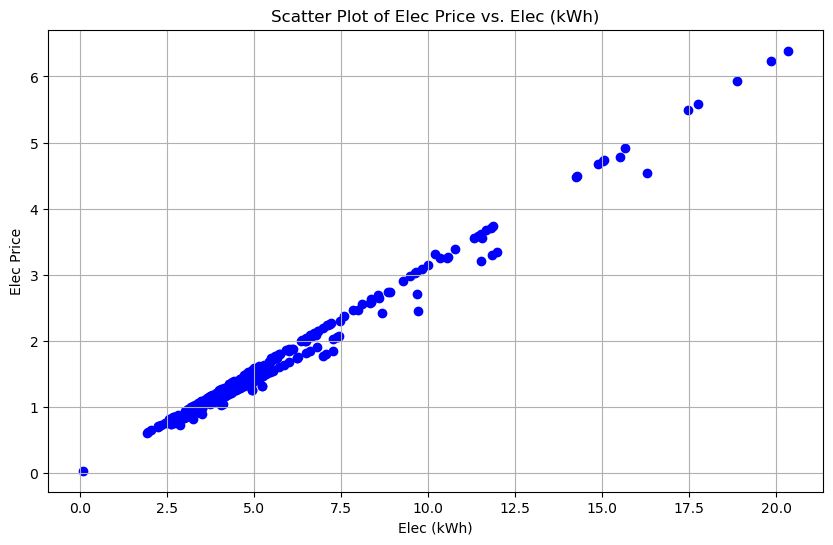

In [18]:
# Scatter plot for visualizing the relationship
plt.figure(figsize=(10,6))
plt.scatter(data['Elec (kWh)'], data['Elec Price'], color='blue', marker='o')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.grid(True)
plt.show()

In [32]:
# Reloading and preprocessing the dataset
dataset = pd.read_csv(r'C:\Users\thoma\python projects\Data Analysis\Other Projects\Ectopus Energy Yearly Dataset.csv')
dataset.fillna(method='ffill', inplace=True)
dataset.fillna(method='bfill', inplace=True)

# Extracting the independent and dependent variables
X = dataset[['Elec (kWh)']]
y = dataset['Elec Price']

# Refitting the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Calculating the mean of 'Elec (kWh)' and making the prediction
mean_elec_kwh = dataset['Elec (kWh)'].mean()
predicted_price_for_mean = regressor.predict([[mean_elec_kwh]])

mean_elec_kwh, predicted_price_for_mean[0]


c:\Users\thoma\anaconda3\envs\conda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(5.732472324723247, 1.71690036900369)

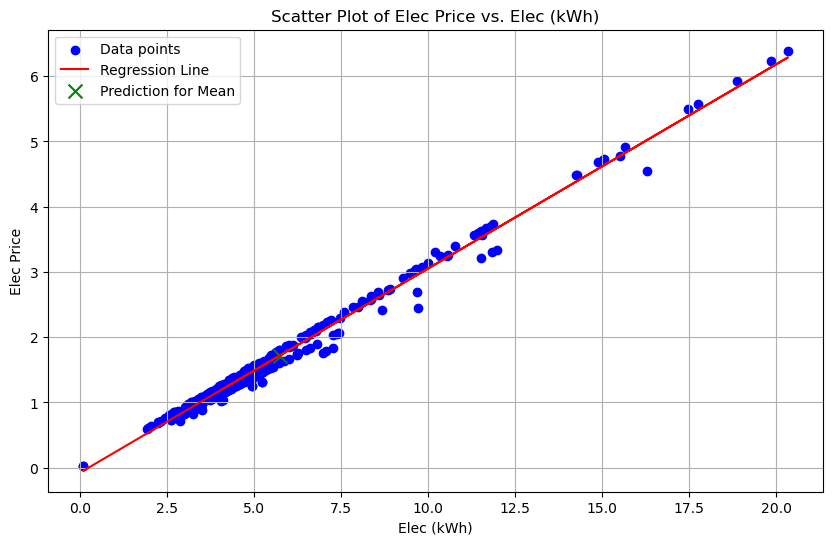

In [33]:
# Generating predicted y-values for the entire dataset using the regression model
y_pred = regressor.predict(X)

# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(dataset['Elec (kWh)'], dataset['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()


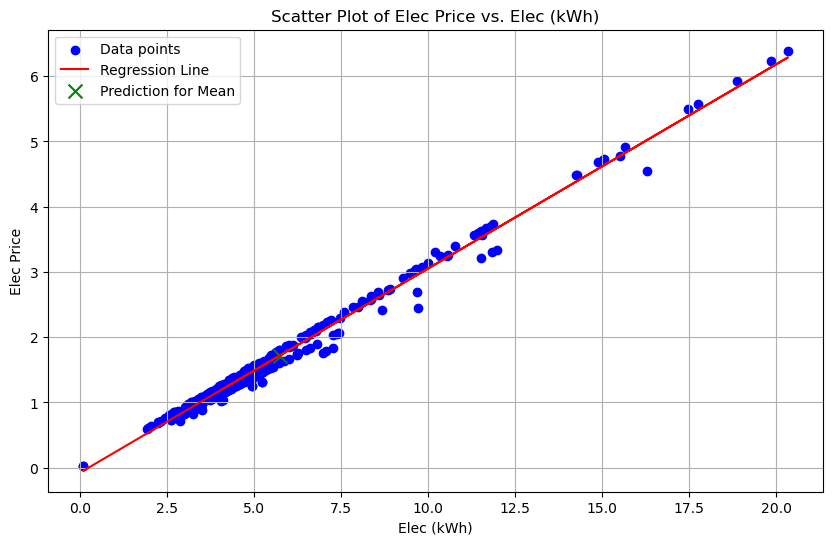

In [34]:
# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(data['Elec (kWh)'], data['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()

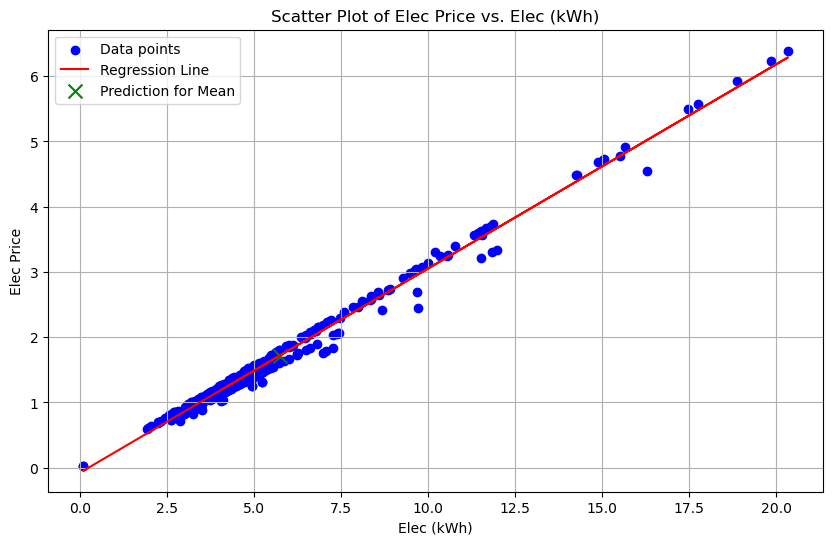

In [37]:
# Generating predicted y-values for the entire dataset using the regression model
y_pred = regressor.predict(X)

# Scatter plot with regression line and mean prediction
plt.figure(figsize=(10,6))
plt.scatter(dataset['Elec (kWh)'], dataset['Elec Price'], color='blue', marker='o', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.scatter(mean_elec_kwh, predicted_price_for_mean, color='green', marker='x', s=100, label='Prediction for Mean')

plt.title('Scatter Plot of Elec Price vs. Elec (kWh)')
plt.xlabel('Elec (kWh)')
plt.ylabel('Elec Price')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Extracting the independent and dependent variables
gas_predict = dataset[['Gas (kWh)']]
elec_predict = dataset['Elec (kWh)']

# Refitting the linear regression model
regressor2 = LinearRegression()
regressor2.fit(gas_predict, elec_predict)

gas_elec_predict = regressor2.predict(gas_predict)

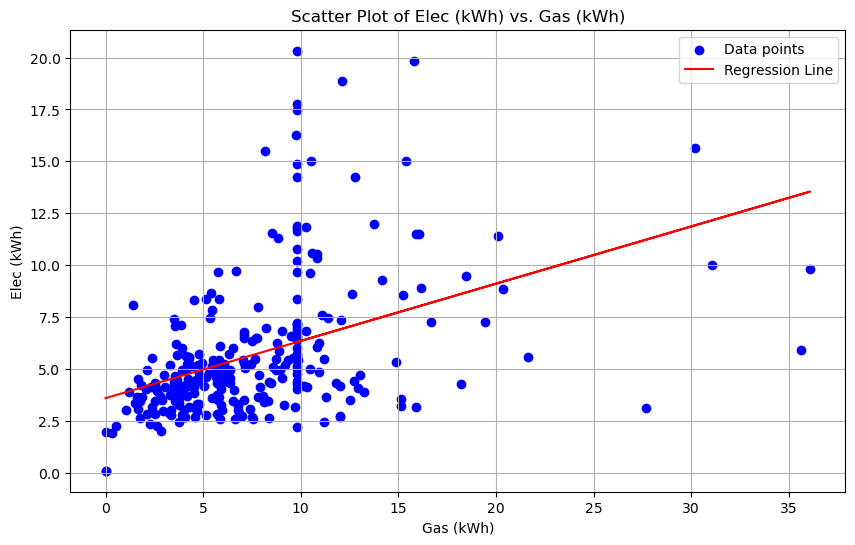

In [49]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(dataset['Gas (kWh)'], dataset['Elec (kWh)'], color='blue', marker='o', label='Data points')
plt.plot(gas_predict, gas_elec_predict, color='red', label='Regression Line')

plt.title('Scatter Plot of Elec (kWh) vs. Gas (kWh)')
plt.xlabel('Gas (kWh)')
plt.ylabel('Elec (kWh)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Filtering the dataset
filtered_dataset = dataset[(dataset['Gas (kWh)'] < 10) & (dataset['Elec (kWh)'] < 10)]

# Extracting the independent and dependent variables from the filtered dataset
gas_predict_filtered = filtered_dataset[['Gas (kWh)']]
elec_predict_filtered = filtered_dataset['Elec (kWh)']

# Refitting the linear regression model using the filtered data
regressor2_filtered = LinearRegression()
regressor2_filtered.fit(gas_predict_filtered, elec_predict_filtered)

# Making predictions using the filtered data
gas_elec_predict_filtered = regressor2_filtered.predict(gas_predict_filtered)

len(filtered_dataset), len(gas_elec_predict_filtered)  # Returning the lengths to verify the filtering and prediction process


(202, 202)

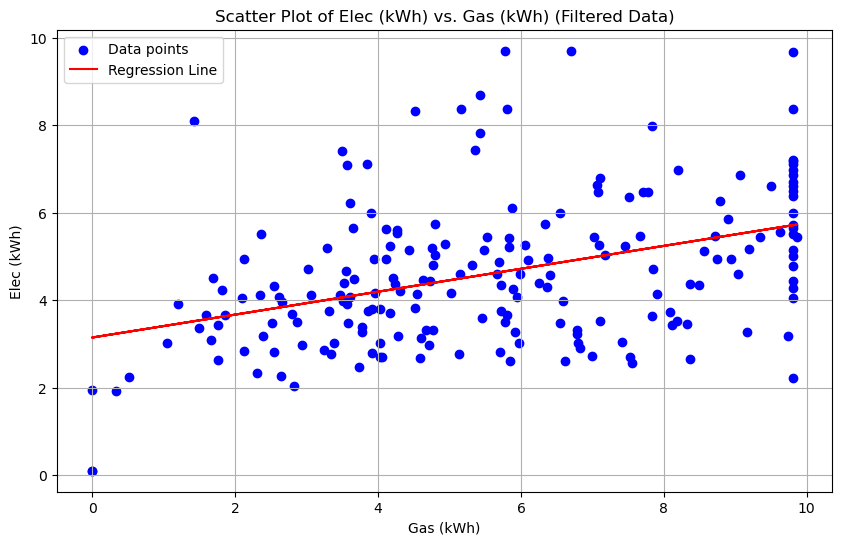

In [51]:
# Scatter plot with regression line for the filtered data
plt.figure(figsize=(10,6))
plt.scatter(filtered_dataset['Gas (kWh)'], filtered_dataset['Elec (kWh)'], color='blue', marker='o', label='Data points')
plt.plot(gas_predict_filtered, gas_elec_predict_filtered, color='red', label='Regression Line')

plt.title('Scatter Plot of Elec (kWh) vs. Gas (kWh) (Filtered Data)')
plt.xlabel('Gas (kWh)')
plt.ylabel('Elec (kWh)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the filtered data into training and test sets (default split: 75% train, 25% test)
gas_train, gas_test, elec_train, elec_test = train_test_split(gas_predict_filtered, elec_predict_filtered, test_size=0.25, random_state=42)

# Training the model using the training set
regressor2_test = LinearRegression()
regressor2_test.fit(gas_train, elec_train)

# Making predictions on the test set
elec_predictions = regressor2_test.predict(gas_test)

# Calculating evaluation metrics
mae = mean_absolute_error(elec_test, elec_predictions)
mse = mean_squared_error(elec_test, elec_predictions)
r2 = r2_score(elec_test, elec_predictions)

mae, mse, r2


(1.1037092779853004, 2.2110555758015655, 0.27245571804888613)